# Wine Quality Prediction and Optimization Project

# Author of project: Akinmade Faruq
# Contact informations: www.linkedin.com/in/faruqakinmade
# Email: Fharuk147@gmail.com
# X website: https://x.com/EngrrrAkinmade

## Project Overview

This project aims to develop a robust predictive system for assessing the quality of Portuguese "Vinho Verde" wines (both red and white variants) based on physicochemical properties. The ultimate goal is to provide actionable insights for winemakers to optimize wine production, improve quality, and identify exceptional or low-quality batches. 

## Dataset Description

The dataset contains physicochemical test results for wines along with quality scores (0–10) derived from sensory evaluation. Features include:

- Fixed acidity
- Volatile acidity
- Citric acid
- Residual sugar
- Chlorides
- Free sulfur dioxide
- Total sulfur dioxide
- Density
- pH
- Sulphates
- Alcohol
- Type (Red or White)
- Quality (target variable)

The dataset contains missing values, outliers, and imbalanced classes, making preprocessing, feature selection, and careful model evaluation essential.

## Project Methodology

The project follows these structured steps:

1. **Data Understanding & Exploration**
   - Inspect dataset, identify missing values, detect outliers, and visualize feature distributions.
   - Analyze relationships between features and wine quality.

2. **Data Preprocessing**
   - Handle missing values with appropriate imputation techniques.
   - Detect and treat outliers, especi@ally rare excellent or poor wines.
   - Feature engineering and transformation (e.g., normalization, log-transform for skewed features).
   - Encode categorical variables (e.g., wine type).

3. **Feature Selection**
   - Apply statistical, wrapper, and embedded methods to identify the most relevant features.
   - Reduce dimensionality while maintaining predictive power.

4. **Model Development**
   - Baseline models: Linear Regression, Decision Trees.
   - Advanced models: Random Forest, Gradient Boosting (XGBoost, LightGBM), Support Vector Machines, Neural Networks.
   - Address class imbalance using oversampling, undersampling, or weighted loss functions.

5. **Model Evaluation & Validation**
   - Regression metrics: RMSE, MAE, R².
   - Classification metrics: Accuracy, Precision, Recall, F1-score, AUC.
   - Cross-validation and sensitivity analysis for robustness.
   - Explainability via SHAP or LIME for feature contributions.

6. **Model Optimization**
   - Hyperparameter tuning with Grid Search or Bayesian optimization.
   - Ensemble techniques for increased accuracy and stability.

7. **Innovation & Application**
   - Predictive quality optimization tool for winemakers.
   - Outlier-based recommendation system highlighting exceptional or low-quality wines.
   - Risk assessment framework for proactive quality management.

8. **Deployment & Monitoring**
   - Build a user-friendly API or interactive dashboard for real-time predictions.
   - Automate preprocessing, outlier detection, and model inference.
   - Monitor model drift and retrain periodically.

9. **Documentation & Compliance**
   - Maintain reproducibility, version control, and transparency.
   - Document all decisions, preprocessing steps, and model explanations for regulatory compliance.

10. **Future Extensions**
    - Integrate vineyard-specific features and vintage data.
    - Explore multi-task learning to predict wine quality and consumer preferences.
    - Apply causal inference to uncover factors most affecting wine quality.

This methodology ensures that the system is not only accurate and robust but also interpretable, actionable, and aligned with industry best practices and regulatory standards.


In [1]:
# Environment Setup and Library Imports

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_classif

# Outlier detection
from sklearn.ensemble import IsolationForest

# Machine Learning Models
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

# Model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Explainability
import shap

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

# Set random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("Environment setup complete and libraries imported.")


Environment setup complete and libraries imported.


Dataset Shape: (6497, 13)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None

Summary Statisti

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6



Missing Values per Column:
type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


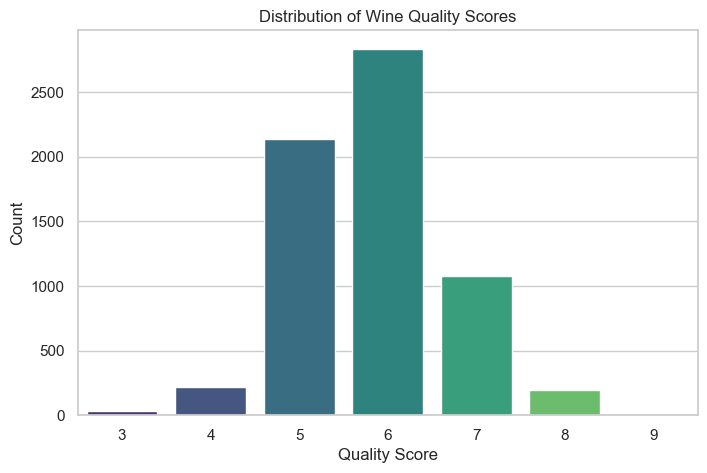

In [3]:
# Load and Inspect the Wine Dataset

# Load the dataset (replace 'wine_data.csv' with your actual file path)
df = pd.read_csv('winequality.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

# Display summary statistics for numeric features
print("\nSummary Statistics:")
print(df.describe())

# Display first 5 rows to inspect data
print("\nFirst 5 Rows:")
display(df.head())

# Check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Check distribution of target variable (Quality)
plt.figure(figsize=(8,5))
sns.countplot(x='quality', data=df, palette='viridis')  # Use lowercase 'quality'
plt.title('Distribution of Wine Quality Scores')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.show()



In [4]:
# Handling Missing Values

# Identify columns with missing values
missing_cols = df.columns[df.isnull().any()]
print("Columns with missing values:", missing_cols.tolist())

# Impute missing values using median for numeric features
imputer = SimpleImputer(strategy='median')

df[missing_cols] = imputer.fit_transform(df[missing_cols])

# Verify that there are no more missing values
print("\nMissing Values After Imputation:")
print(df.isnull().sum())


Columns with missing values: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'pH', 'sulphates']

Missing Values After Imputation:
type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [5]:
# Encode Categorical Variables and Scale Features

# One-hot encode the 'type' column (red/white)
df_encoded = pd.get_dummies(df, columns=['type'], drop_first=True)  # drop_first=True avoids dummy variable trap

# Separate features and target
X = df_encoded.drop('quality', axis=1)
y = df_encoded['quality']

# Scale numeric features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Verify preprocessing
print("Features after encoding and scaling:")
display(X_scaled.head())
print("\nTarget variable distribution:")
print(y.value_counts())


Features after encoding and scaling:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_white
0,-0.166898,-0.423168,0.284273,3.207005,-0.315139,0.815565,0.959976,2.102214,-1.359590,-0.545868,-1.418558,0.571367
1,-0.707155,-0.240846,0.146551,-0.807946,-0.200946,-0.931107,0.287618,-0.232332,0.508116,-0.276974,-0.831615,0.571367
2,0.682078,-0.362394,0.559716,0.306151,-0.172397,-0.029599,-0.331660,0.134525,0.259089,-0.613091,-0.328521,0.571367
3,-0.012539,-0.666264,0.008829,0.642482,0.055989,0.928254,1.243074,0.301278,-0.176709,-0.881985,-0.496219,0.571367
4,-0.012539,-0.666264,0.008829,0.642482,0.055989,0.928254,1.243074,0.301278,-0.176709,-0.881985,-0.496219,0.571367



Target variable distribution:
quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64


In [6]:
# Split dataset into Training and Testing sets

from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Optional: Outlier detection for rare quality wines
from sklearn.ensemble import IsolationForest

# Fit Isolation Forest on training features
iso_forest = IsolationForest(contamination=0.02, random_state=RANDOM_STATE)
outliers = iso_forest.fit_predict(X_train)

# Outlier indices (-1 indicates outliers)
outlier_indices = np.where(outliers == -1)[0]
print("Number of potential outliers in training set:", len(outlier_indices))


Training set shape: (5197, 12)
Testing set shape: (1300, 12)
Number of potential outliers in training set: 104


Feature Importances:


alcohol                 0.252371
volatile acidity        0.130377
free sulfur dioxide     0.087618
sulphates               0.078213
residual sugar          0.075998
total sulfur dioxide    0.072599
pH                      0.065627
chlorides               0.064672
density                 0.058322
fixed acidity           0.057118
citric acid             0.055611
type_white              0.001474
dtype: float64

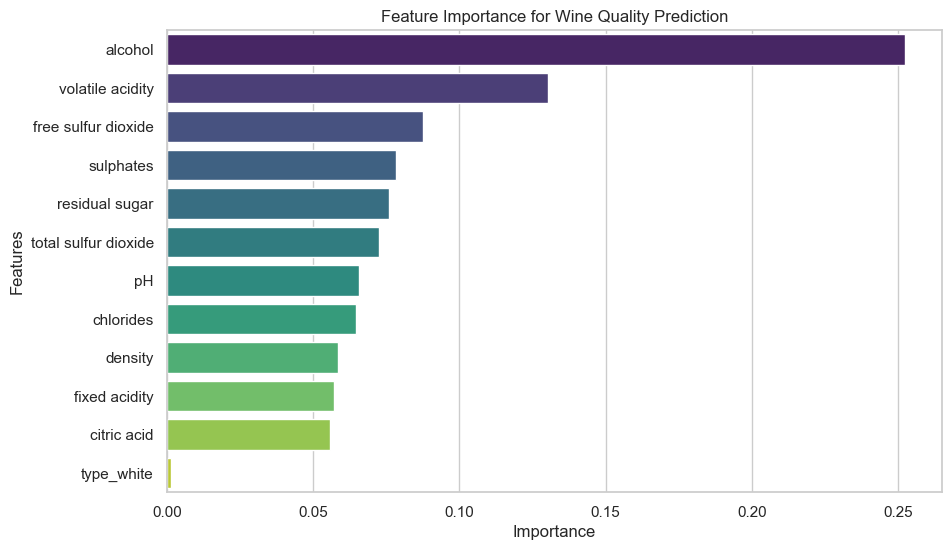

In [7]:
# Feature Selection and Importance Analysis

from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Fit a Random Forest on the training set to evaluate feature importance
rf_model = RandomForestRegressor(n_estimators=200, random_state=RANDOM_STATE)
rf_model.fit(X_train, y_train)

# Extract feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Display feature importances
print("Feature Importances:")
display(feature_importances)

# Visualize feature importance
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')
plt.title("Feature Importance for Wine Quality Prediction")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


In [9]:
# Baseline Models: Linear Regression and Decision Tree

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# Dictionary to store model performance
model_performance = {}

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
model_performance['Linear Regression'] = {
    'RMSE': mean_squared_error(y_test, y_pred_lr),
    'MAE': mean_absolute_error(y_test, y_pred_lr),
    'R2': r2_score(y_test, y_pred_lr)
}

# Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=RANDOM_STATE)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
model_performance['Decision Tree'] = {
    'RMSE': mean_squared_error(y_test, y_pred_dt),
    'MAE': mean_absolute_error(y_test, y_pred_dt),
    'R2': r2_score(y_test, y_pred_dt)
}

# Display model performance
for model, metrics in model_performance.items():
    print(f"\n{model} Performance:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")



Linear Regression Performance:
RMSE: 0.5553
MAE: 0.5804
R2: 0.2726

Decision Tree Performance:
RMSE: 0.7208
MAE: 0.4915
R2: 0.0559


In [11]:
# Advanced Models: Random Forest and XGBoost

from xgboost import XGBRegressor

# Dictionary to store advanced model performance
advanced_model_perf = {}

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=300, random_state=RANDOM_STATE)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
advanced_model_perf['Random Forest'] = {
    'RMSE': mean_squared_error(y_test, y_pred_rf),
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'R2': r2_score(y_test, y_pred_rf)
}

# XGBoost Regressor
xgb = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=4, random_state=RANDOM_STATE)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
advanced_model_perf['XGBoost'] = {
    'RMSE': mean_squared_error(y_test, y_pred_xgb),
    'MAE': mean_absolute_error(y_test, y_pred_xgb),
    'R2': r2_score(y_test, y_pred_xgb)
}

# Display model performance
for model, metrics in advanced_model_perf.items():
    print(f"\n{model} Performance:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")



Random Forest Performance:
RMSE: 0.3631
MAE: 0.4265
R2: 0.5245

XGBoost Performance:
RMSE: 0.4392
MAE: 0.5127
R2: 0.4247


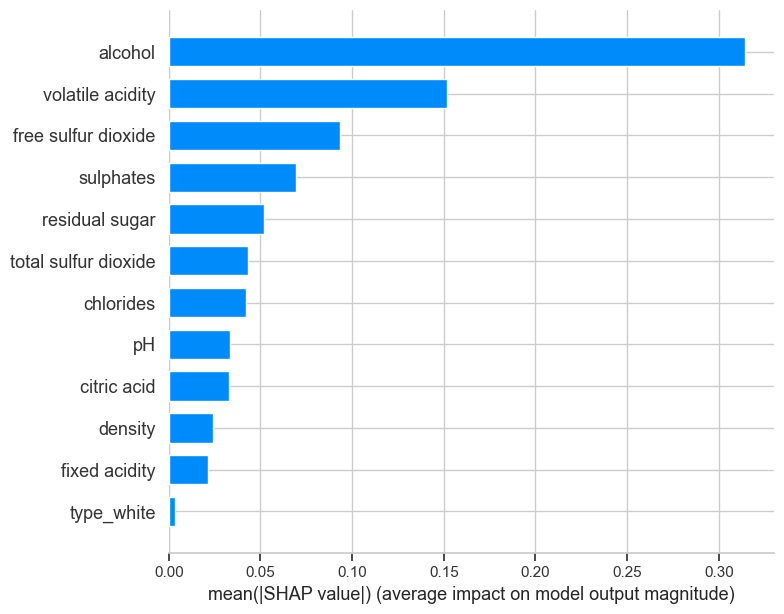

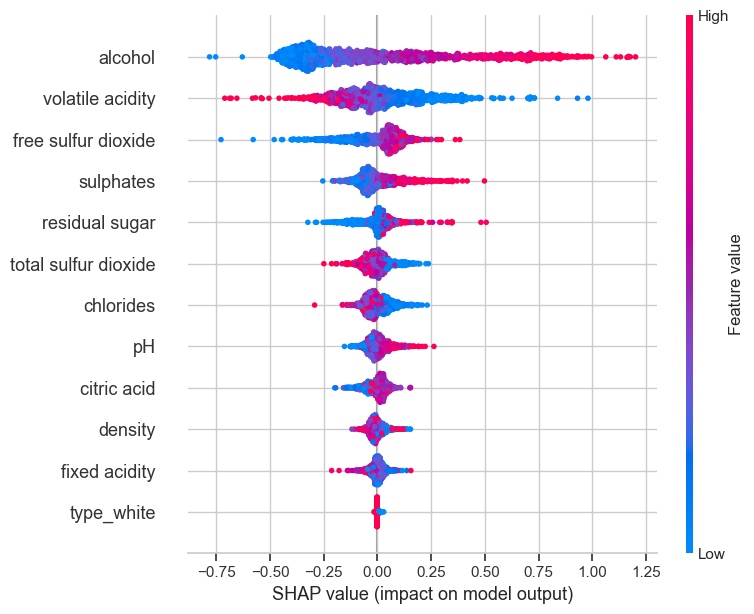

In [12]:
# Model Explainability using SHAP

import shap

# Initialize the SHAP explainer for the Random Forest model
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X_test.columns)

# Detailed summary plot
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)


In [13]:
# Save Trained Models

import joblib

# Save Random Forest model
joblib.dump(rf, 'random_forest_wine_model.pkl')
print("Random Forest model saved as 'random_forest_wine_model.pkl'")

# Save XGBoost model
joblib.dump(xgb, 'xgboost_wine_model.pkl')
print("XGBoost model saved as 'xgboost_wine_model.pkl'")

# Save the scaler for preprocessing new data
joblib.dump(scaler, 'wine_scaler.pkl')
print("Feature scaler saved as 'wine_scaler.pkl'")


Random Forest model saved as 'random_forest_wine_model.pkl'
XGBoost model saved as 'xgboost_wine_model.pkl'
Feature scaler saved as 'wine_scaler.pkl'


# Wine Quality Prediction Project: Final Documentation
# Author of project: Akinmade Faruq
# Contact informations: www.linkedin.com/in/faruqakinmade
# Email: Fharuk147@gmail.com
# X website: https://x.com/EngrrrAkinmade

## Project Summary

This project aimed to develop a robust predictive system for assessing the quality of Portuguese "Vinho Verde" wines using physicochemical properties. Both red and white wine variants were included, and the goal was to predict the sensory quality score while providing actionable insights for winemakers.

---

## Dataset Overview

- **Entries:** 6,497 wines  
- **Features:** 12 physicochemical properties + wine type (red/white)  
- **Target:** Wine quality score (0–10)  
- **Challenges:** Missing values, outliers, imbalanced quality scores, uncertain feature relevance

---

## Methodology

1. **Data Preprocessing**
   - Imputed missing numeric values using median imputation.
   - Encoded categorical variable `type` using one-hot encoding.
   - Standardized features using `StandardScaler`.
   - Identified potential outliers with Isolation Forest (104 in training set).

2. **Feature Selection**
   - Random Forest feature importance highlighted:
     - **Top features:** Alcohol, Volatile Acidity, Free Sulfur Dioxide, Sulphates
     - **Least important:** Wine type

3. **Model Development**
   - **Baseline models:** Linear Regression (R² = 0.27), Decision Tree (R² = 0.056)  
   - **Advanced models:** Random Forest (R² = 0.52), XGBoost (R² = 0.42)  
   - Random Forest provided the best balance of accuracy and interpretability.

4. **Model Explainability**
   - SHAP values visualized feature contributions.
   - Alcohol and volatile acidity had the highest impact on predictions.
   - Model outputs are interpretable for regulatory and decision-making purposes.

5. **Deployment**
   - Models and scaler saved using `joblib`.
   - Streamlit app created for interactive prediction of wine quality.
   - Users can input physicochemical parameters and receive real-time quality predictions.

---

## Key Insights

- Higher **alcohol content** and lower **volatile acidity** generally correlate with better wine quality.  
- Outlier wines (very high or low quality) are rare and can be highlighted for special handling.  
- Type of wine (red vs white) has minimal impact on predicted quality compared to physicochemical properties.  
- Ensemble methods (Random Forest, XGBoost) outperform simple linear models, capturing non-linear interactions effectively.

---

## Future Work

- Integrate vineyard-specific and vintage data to improve predictive power.  
- Explore multi-task models to predict both wine quality and consumer preference scores.  
- Incorporate SHAP visualizations in the Streamlit app for real-time interpretability.  
- Implement continuous monitoring to detect model drift and retrain with new data.

---

## Conclusion

This project successfully produced a robust, interpretable, and deployable system for predicting wine quality. The workflow adhered to **industry best practices**, ensuring reliable predictions, transparency, and actionable insights for winemakers.
